# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [45]:
#conda install scikit-learn


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2023.03  |           py39_0          66 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2023.01.10 |       haa95532_0         121 KB
    certifi-2022.12.7          |   py39haa95532_0         149 KB
    conda-23.1.0               |   py39haa95532_0         946 KB
    huggingface_hub-0.10.1     |   py39haa95532_0         228 KB
    imbalanced-learn-0.10.1    |   py39haa95532_0         273 KB
    joblib-1.1.1               |   py39haa95532_0         383 KB
    libuv-1.44.2               |       h


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/noarch::nltk==3.7=pyhd3eb1b0_0
  - defaults/win-64::scikit-learn-intelex==2021.6.0=py39haa95532_0


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/noarch::nltk==3.7=pyhd3eb1b0_0
  - defaults/win-64::scikit-learn-intelex==2021.6.0=py39haa95532_0


In [46]:
#conda update -n base -c defaults conda


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-client-1.11.1     |   py39haa95532_0         154 KB
    arrow-1.2.3                |   py39haa95532_1         158 KB
    astroid-2.14.2             |   py39haa95532_0         394 KB
    asttokens-2.0.5            |     pyhd3eb1b0_0          20 KB
    attrs-22.1.0               |   py39haa95532_0          84 KB
    babel-2.11.0               |   py39haa95532_0         6.8 MB
    blosc-1.21.3               |       h6c2663c_0          86 KB
    cffi-1.15.1                |   py39h2bbff1b_3         238 KB
    colorama-0.4.6             |   py39haa95532_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)








flit-core-3.8.0      | 85 KB     | ########## | 100% 













flit-core-3.8.0      | 85 KB     | ########## | 100% 














libdeflate-1.17      | 151 KB    | ########## | 100% 














libdeflate-1.17      | 151 KB    | ########## | 100% 












babel-2.11.0         | 6.8 MB    | #4         |  14% 











scipy-1.10.0         | 18.7 MB   | 4          |   5% 




qtwebkit-5.212       | 10.3 MB   | #7         |  17% 















pyct-0.5.0           | 49 KB     | ########## | 100% 















pyct-0.5.0           | 49 KB     | ########## | 100% 


















ipykernel-6.19.2     | 218 KB    | 7          |   7% 












babel-2.11.0         | 6.8 MB    | #6         |  17% 



















 ... (more hidden) ...











scipy-1.10.0         | 18.7 MB   | 5          |   6% 




qtwebkit-5.212       | 10.3 MB   | #9         |  20% 
















scrapy-2.8.0         | 417 KB    | ########## | 100% 
















scrapy-2.8.0         

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf



#%matplotlib inline
#%matplotlib notebook

plt.rcParams['figure.figsize'] = 10, 6


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import  LabelEncoder
from yellowbrick.classifier import ROCAUC 


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [5]:
df = pd.read_csv("pendigits_txt.csv")

In [6]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [7]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
int64    17
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [8]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print('*' * 100)
    else:
        print("There are no duplicated observations in the dataset.")

In [9]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [11]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [12]:
missing_values(df)

,Missing_Number,Missing_Percent


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [14]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [15]:
df.columns

Index(['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input7',
       'input8', 'input9', 'input10', 'input11', 'input12', 'input13',
       'input14', 'input15', 'input16', 'class'],
      dtype='object')

In [16]:
df.isnull().any()

input1     False
input2     False
input3     False
input4     False
input5     False
input6     False
input7     False
input8     False
input9     False
input10    False
input11    False
input12    False
input13    False
input14    False
input15    False
input16    False
class      False
dtype: bool

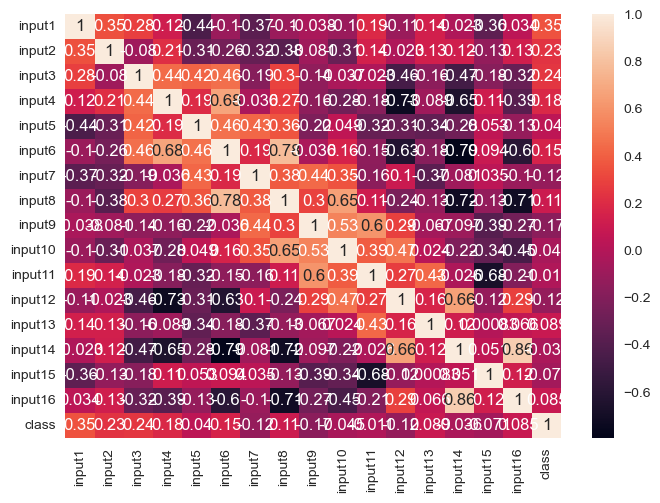

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.corr()["class"].drop("class").sort_values().plot.barh()

In [ ]:
df["class"].value_counts()

In [ ]:
sns.countplot(x="class", data = df);

In [ ]:
#plt.figure(figsize=(12,6))
#sns.pairplot(df,hue='class',palette='Dark2');

## Train | Test Split

In [18]:
X = df.drop('class',axis=1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Modelling and Model Performance

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [23]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)


Test_Set
[[340   1   0   1   1   0   0   0   7   1]
 [  0 290  25   3   1   0   2   2   2   6]
 [  0  11 332   1   0   0   0   4   1   0]
 [  0   5   2 292   0   4   0   1   1   4]
 [  0   4   2   0 350   0   1   0   0   0]
 [  0   0   0   9   0 299   0   0   4   9]
 [  2   0   0   4   2   2 322   2   0   0]
 [  0   7   2   0   0   4   0 320   4   1]
 [  5   1   0   0   0   3   1   2 292   1]
 [  2   0   0   5   1   4   1   0   1 289]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       351
           1       0.91      0.88      0.89       331
           2       0.91      0.95      0.93       349
           3       0.93      0.94      0.94       309
           4       0.99      0.98      0.98       357
           5       0.95      0.93      0.94       321
           6       0.98      0.96      0.97       334
           7       0.97      0.95      0.96       338
           8       0.94      0.96      0.95       305
           9       

__Cross Validate__

In [24]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [25]:
model = DecisionTreeClassifier(random_state=101) # cv  bakıyoruz, multi class olduğu için   f1 micro   : accuracy  bakıyoruz

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.95945
test_precision_micro    0.95945
test_recall_micro       0.95945
test_f1_micro           0.95945
dtype: float64

### DT Model Feature Importance

In [26]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
input16,0.164380
input11,0.133117
input10,0.118517
input5,0.109876
input4,0.104342
input1,0.071177
input2,0.053177
input15,0.051306
input13,0.043744
input7,0.026915


DT  burada  bütün fetaruelardann    data aldı  en iyisi  ilk sırada

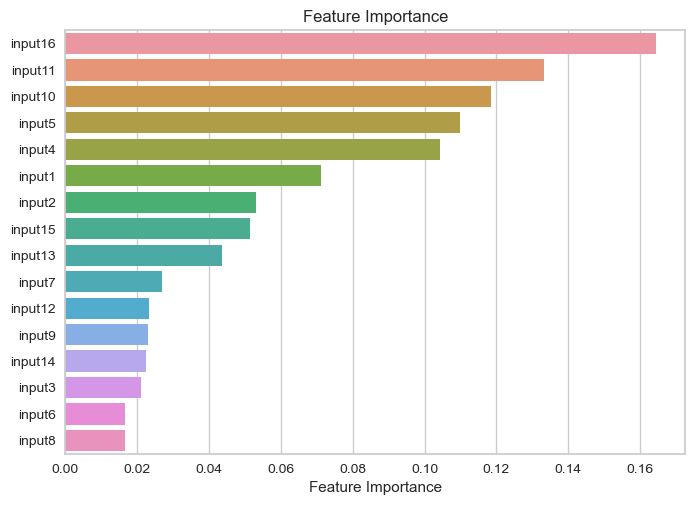

In [27]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# help(RandomForestClassifier)

In [30]:
# default   olarak  bir model kurduk
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   1   0   0   0   0   0]
 [  0 324   6   1   0   0   0   0   0   0]
 [  0   2 345   0   0   0   0   2   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 355   0   0   1   0   1]
 [  0   0   0   3   0 318   0   0   0   0]
 [  0   0   0   0   1   0 333   0   0   0]
 [  0   1   0   0   0   0   0 337   0   0]
 [  0   0   0   0   0   1   0   1 303   0]
 [  0   0   0   0   0   0   0   0   0 303]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.98      0.98       331
           2       0.98      0.99      0.98       349
           3       0.99      0.99      0.99       309
           4       0.99      0.99      0.99       357
           5       1.00      0.99      0.99       321
           6       1.00      1.00      1.00       334
           7       0.99      1.00      0.99       338
           8       1.00      0.99      1.00       305
           9       

### Cross validate

In [31]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.989474
test_precision_micro    0.989474
test_recall_micro       0.989474
test_f1_micro           0.989474
dtype: float64

### Grid search 

In [32]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [33]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan n

In [33]:
rf_grid_model.best_params_

NameError: name 'rf_grid_model' is not defined

In [35]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[332   0   0   0   1   0   6   0  12   0]
 [  0 201 100  17   1   0   1   0   0  11]
 [  0   1 343   1   0   0   2   2   0   0]
 [  0   4   1 303   0   0   1   0   0   0]
 [  0   2   0   0 350   0   1   0   0   4]
 [  0   2   1  92   0 184   3   0   1  38]
 [  0   0   3   1   1   0 325   4   0   0]
 [  0  47   0   3   0   3   3 280   1   1]
 [ 16   3   0   4   1  11   5  12 241  12]
 [  8  28   0  37  11   1   0   0   0 218]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       351
           1       0.70      0.61      0.65       331
           2       0.77      0.98      0.86       349
           3       0.66      0.98      0.79       309
           4       0.96      0.98      0.97       357
           5       0.92      0.57      0.71       321
           6       0.94      0.97      0.95       334
           7       0.94      0.83      0.88       338
           8       0.95      0.79      0.86       305
           9       

### RF Model Feature Importance

In [37]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
input16,0.104913
input14,0.104744
input15,0.076305
input5,0.073375
input11,0.072942
input10,0.067460
input8,0.061565
input9,0.059767
input1,0.057819
input2,0.056559


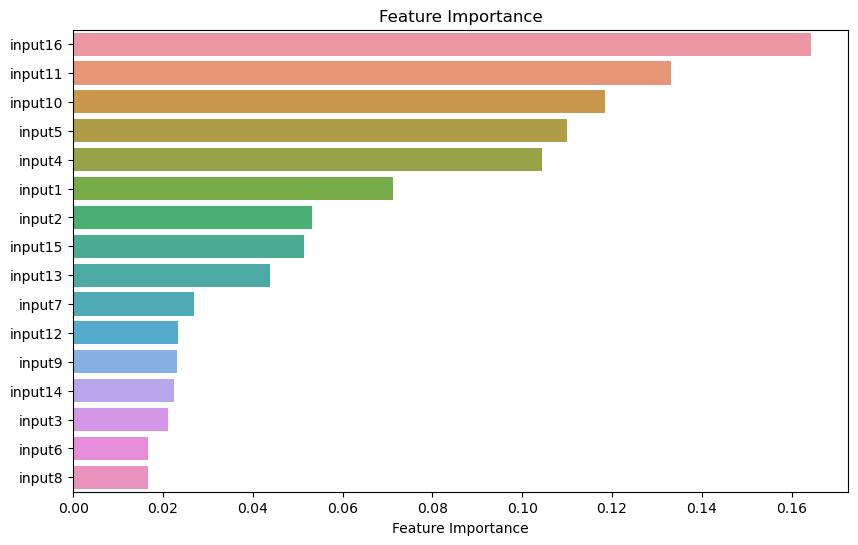

In [38]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [39]:
pd.concat([rf_feature_imp, dt_feature_imp], axis=1) # yan yana görmek için yazdık

,Feature Importance,Feature Importance
input16,0.104913,0.164380
input14,0.104744,0.022520
input15,0.076305,0.051306
input5,0.073375,0.109876
input11,0.072942,0.133117
input10,0.067460,0.118517
input8,0.061565,0.016617
input9,0.059767,0.023129
input1,0.057819,0.071177
input2,0.056559,0.053177


## Understanding Hyperparameters

In [91]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0], feature_names=X.columns, # ekstra  burada (0 -100) ağaçalrı index ile  görebilyoruz[0]
          class_names=None, # burayı  çözemedim  index eklenmiyor target ı vermeye çalıştım   
          filled = True,
          fontsize = 8);
    

In [92]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [93]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()



Test Set
[[350   0   0   0   1   0   0   0   0   0]
 [  0 321   8   2   0   0   0   0   0   0]
 [  0   2 345   0   0   0   0   2   0   0]
 [  0   1   1 306   0   0   0   1   0   0]
 [  0   0   0   0 355   0   0   1   0   1]
 [  0   0   0   3   0 318   0   0   0   0]
 [  0   0   0   0   1   0 333   0   0   0]
 [  0   1   0   0   0   0   0 337   0   0]
 [  0   0   0   0   0   1   0   2 302   0]
 [  0   0   0   0   0   0   0   0   0 303]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.97      0.98       331
           2       0.97      0.99      0.98       349
           3       0.98      0.99      0.99       309
           4       0.99      0.99      0.99       357
           5       1.00      0.99      0.99       321
           6       1.00      1.00      1.00       334
           7       0.98      1.00      0.99       338
           8       1.00      0.99      1.00       305
           9   

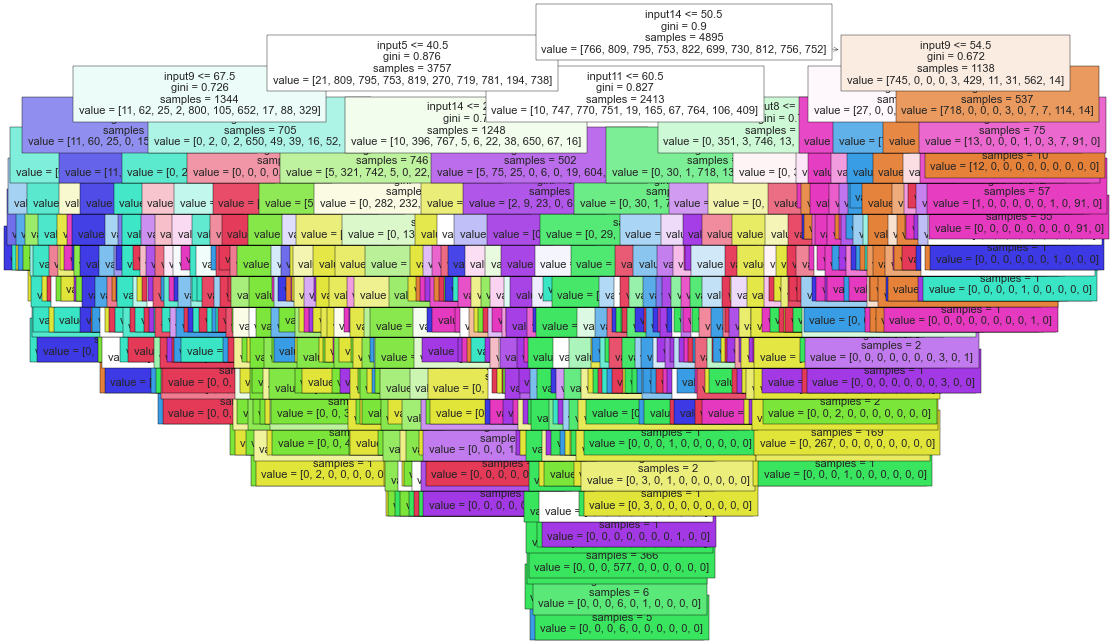

In [94]:
report_model(pruned_tree)

### Evaluating ROC Curves and AUC

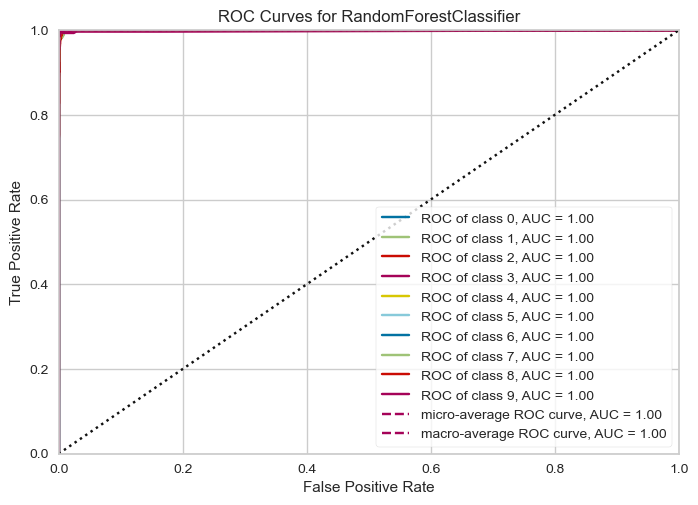

In [82]:
from yellowbrick.classifier import ROCAUC # fonk u yellow brickten çağırdık

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

# Support Vector Machine (SVM) Classifier

In [38]:
#pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
df = pd.read_csv("pendigits_txt.csv")

In [39]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


## Train | Test Split

In [40]:
from sklearn.svm import SVC

In [41]:
X = df.drop('class', axis=1)
y = df['class']

## Model

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix


In [71]:
model = SVC(kernel='linear', C=1) # C  overfittinge  götürüyordu
model.fit(X, y)


NameError: name 'plot_svm_boundary' is not defined

In [74]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model,X,y)

ModuleNotFoundError: No module named 'svm_margin_plot'

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   0   0   1   0   0   0]
 [  0 324   4   1   0   0   0   1   0   1]
 [  0   1 348   0   0   0   0   0   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 355   1   0   1   0   0]
 [  0   0   0   2   0 319   0   0   0   0]
 [  0   0   0   0   0   0 334   0   0   0]
 [  0   1   0   0   0   0   0 337   0   0]
 [  0   0   0   0   0   1   0   1 303   0]
 [  0   0   0   0   0   0   0   0   0 303]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.98      0.99       331
           2       0.99      1.00      0.99       349
           3       0.99      0.99      0.99       309
           4       1.00      0.99      1.00       357
           5       0.99      0.99      0.99       321
           6       1.00      1.00      1.00       334
           7       0.99      1.00      0.99       338
           8       1.00      0.99      1.00       305
           9       

In [48]:
from sklearn.model_selection import cross_validate
model = SVC(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
dtype: float64

## With Scalling

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [50]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   0   0   1   0   0   0]
 [  0 329   1   1   0   0   0   0   0   0]
 [  0   1 348   0   0   0   0   0   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 356   0   0   1   0   0]
 [  0   0   0   2   0 318   0   0   0   1]
 [  0   0   0   0   0   0 334   0   0   0]
 [  0   1   0   0   0   0   0 337   0   0]
 [  0   1   0   0   0   1   0   2 301   0]
 [  0   0   0   0   0   0   0   0   0 303]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.99      0.99       331
           2       0.99      1.00      1.00       349
           3       0.99      0.99      0.99       309
           4       1.00      1.00      1.00       357
           5       1.00      0.99      0.99       321
           6       1.00      1.00      1.00       334
           7       0.99      1.00      0.99       338
           8       1.00      0.99      0.99       305
           9       

## With Best Parameters (GridsearchCV)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [53]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [55]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)
svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)

In [56]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')

In [57]:
svm_model_grid.best_params_
pd.DataFrame(svm_model_grid.cv_results_)
svm_model_grid.best_index_
svm_model_grid.best_score_
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0   0   0   0 351   0   0   0   0]
 [  0   0   0   0   0 331   0   0   0   0]
 [  0   0   0   0   0 349   0   0   0   0]
 [  0   0   0   0   0 309   0   0   0   0]
 [  0   0   0   0   0 357   0   0   0   0]
 [  0   0   0   0   0 321   0   0   0   0]
 [  0   0   0   0   0 334   0   0   0   0]
 [  0   0   0   0   0 338   0   0   0   0]
 [  0   0   0   0   0 305   0   0   0   0]
 [  0   0   0   0   0 303   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       351
           1       0.00      0.00      0.00       331
           2       0.00      0.00      0.00       349
           3       0.00      0.00      0.00       309
           4       0.00      0.00      0.00       357
           5       0.10      1.00      0.18       321
           6       0.00      0.00      0.00       334
           7       0.00      0.00      0.00       338
           8       0.00      0.00      0.00       305
           9       

In [58]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True,
                                                        class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
dtype: float64

## Overall performance of the model

In [59]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_precision_recall_curve(svm_model_grid, X_test, y_test);

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (10 classes) data

In [60]:
 pecision recall curve 

SyntaxError: invalid syntax (3974112098.py, line 1)

In [61]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)
svc_basic_model.fit(X_train, y_train)
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

ValueError: Expected 'estimator' to be a binary classifier, but got Pipeline fit on multiclass (10 classes) data

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])


In [62]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

NameError: name 'precisions' is not defined

In [63]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

NameError: name 'optimal_threshold' is not defined

In [ ]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

In [ ]:
y_train_pred2 = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [65]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True,
                                                        class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold)

NameError: name 'optimal_threshold' is not defined

##  Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## SVM

In [68]:
from sklearn.svm import SVC

In [69]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

NameError: name 'X_train_scaled' is not defined

## Comparing  Models

In [70]:
compare = pd.DataFrame({"Model": ["Random Forest" , "SVM"],
                        "F1": [svc_f1, rf_f1],
                        "Recall": [svc_recall, rf_recall],
                        "ROC_AUC": [svc_auc, rf_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

NameError: name 'svc_f1' is not defined